MESA is a stellar structure code that solves the equations of stellar structure, including time-dependent evolution
of the structure due to the energy equation.

MESA is installed on the machines and we will be using it to run a solar model in class.

Begin by creating a directory called 1msun under astr534. This will be where the model is evolved.

`>>> cd ~/Desktop/work`

And copy over the MESA run files to this directory (this will 

`>>> rsync -avz  ~/Desktop/notebooks/astr534/mesa_files/1msun ./`

Compile the code

`>>> cd ~/Desktop/work/1msun`

`>>> ./mk`

And run

`>>> ./rn`

This will evolve the Sun from its birth to present-day.

Exercise 0.
As the model runs, there will be an abundance plot showing the evolution of the abundances of species as a function of radius in the star.
It will also show the simultaneous evolution of the star on the H-R diagram.
Before it begins H burning, how is the star maintaining its luminosity?

Note that you may look at the H-R diagram and abundance plots by doing:

`>>> open png/*`

In [91]:
# this will make sure that Poly2 is imported in, which you will want to compare polytropic solutions to MESA's solutions.
# it will produce the output from this notebook, which you can just ignore.
# %run lane_emden_soln.ipynb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


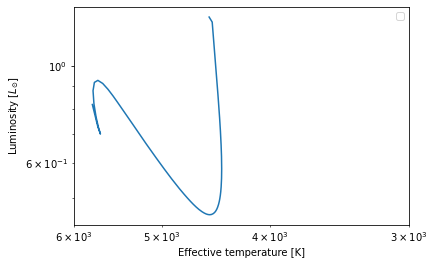

In [96]:
import mesa_reader # this will enable reading the stellar data
import glob # this will help with getting filenames in the directory storing the MESA output
import pylab as plt
%matplotlib inline

# The resulting output is in LOGS_to_sun.

d = '/Users/ASTR434/Desktop/work/1msun/' # you will need to change this to be the location of your working 1msun directory

# One of the output files is called history.data, which can be read in like:
# mesa_header = mesa_reader.MesaData(d+'/LOGS_to_sun/history.data').bulk_data 
# and will contain the evolution of a certain quantity as a function of time, with
# each row representing that property of the star a certain time later
# There are several quantities available. E.g.:
# log_Teff: log10(Temperature at surface in K)
# log_L: log10(Luminosity of the star in solar units)
# log_R: log10(radius of the star in solar units)
# star_age: age of the star in years
# log_LH: log10(luminosity of the star due to H burning in solar units)
# log_center_T: log10(central temperature in K)
# center_h1: H mass fraction at the center
# there are other columns, as well, and descriptions are available if you open a new terminal window and do:
# >>> cd $MESA_DIR/star/defaults
# >>> open history_columns.list

# this will show the H-R diagram
history = mesa_reader.MesaData(d+'/LOGS_to_sun/history.data').bulk_data 
plt.plot(10**history['log_Teff'], 10**history['log_L']) # plot the effective temperature and luminosity of each model step.
plt.xlim([6000, 3000]) # with the x-axis backward
plt.xscale('log') # H-R diagrams are shown in log-log space
plt.yscale('log') 
plt.xlabel(r'Effective temperature [K]')
plt.ylabel(r'Luminosity [$L_{\odot}$]')

# MESA will also save entire stellar structures (not just the star's bulk properties)
# every so often as the star evolves in what are called 'profile' files.
# the resulting profile files (e.g., LOGS_to_sun/profile1.data [ignore the *.GYRE files for now]) have two components:
# 1) a header, which can be read in using 
# mesa_header = mesa_reader.MesaData(d+'/LOGS_to_sun/profile1.data').header_data
# and which contains global information about the star. E.g.:
# mesa_header['photosphere_L']
# and
# 2) a bulk data table, which can be read in using
# mesa = mesa_reader.MesaData(d+'/LOGS_to_sun/profile1.data').bulk_data
# and which contains information about the star at every point in its interior (the first row is the topmost layer and the last is the center). E.g.:
# logR: log10(radius coordinate in cm)
# logT: log10(temperature in K)
# logRho: log10(density in cgs units)
# logP: log10(pressure in cgs units)
# pressure_scale_height: pressure scale height in cm
# grada: adiabatic thermal gradient (nabla_ad)
# gradr: radiative thermal gradient (nabla_rad)
# gradT: actual thermal gradient
# h1: mass fraction of hydrogen
# there are other columns, as well, and descriptions are available if you open a new terminal window and do:
# >>> cd $MESA_DIR/star/defaults
# >>> open profile_columns.list

files = glob.glob(d+'/LOGS_to_sun/profile*.data') # this will get all the profile files and put them in a list that can be looped over.

# Exercise 1.
# Plot the locations of the profile models on the H-R diagram using a for loop.
# Give each one a label called
# 'profile'+f.split('profile')[-1]
# where f is the filename in the <files> list that you are looping over.

for f in files:
    pass

plt.legend()
plt.show()

# Compare this to the solar-mass H-R diagram from this paper (Fig. 3):
# http://adsabs.harvard.edu/abs/2016ApJ...823..102C
# They define the beginning of the main sequence to be when
# the first point at which H burning luminosity is 99.9% of the total AND
# the central hydrogen mass fraction has not fallen below 0.0015 of its initial value.
# which profile is closest to the beginning of the main sequence (zero-age main sequence [ZAMS])?
# (Using just your eye to compare for now.)

# Exercise 2.
# Using the same range for the x-axis as your H-R diagram, but in separate plots,
# Show that this is reasonable by looking at two quantities:
# 1) H burning luminosity as a function of temperature
# and
# 2) central hydrogen mass fraction as a function of temperature
# (Use plt.show() after each to make them be in separate plots.)

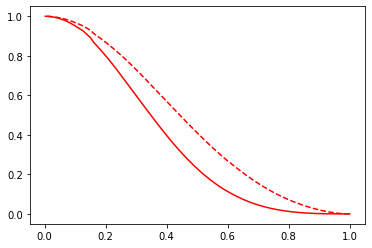

In [95]:
# Now let's see what the pressure and density profile of the Sun at different stages in its evolution look like.

mesa = mesa_reader.MesaData(d+'/LOGS_to_sun/profile1.data').bulk_data
mesa_header = mesa_reader.MesaData(d+'/LOGS_to_sun/profile1.data').header_data

plt.plot(10.**mesa['logR']/mesa_header['photosphere_r'], 10.**mesa['logP']/10.**mesa['logP'][-1], color='red', label='MESA P ')
plt.plot(10.**mesa['logR']/mesa_header['photosphere_r'], 10.**mesa['logRho']/10.**mesa['logRho'][-1], color='red', label=r'MESA $\rho$', linestyle='dashed')

# Exercise 3.
# Plot the polytrope pressure and density profile for comparison for different values of n, being sure to normalize by the central pressure and density. n=3, from the previous HW, describes a star
# with a constant fraction of its pressure supplied by radiation, and has been historically used to model the Sun.
# To compare to the above MESA plots, you will need to plot r/R on the x-axis.

# p = Poly2(n=3)

# p has attributes Rx (p.Rx)
# and methods
# p.P0(x, M, R) --- the pressure as a function of re-scaled radius, x, M (in solar units), and R (in solar units)
# p.rho0(x, M, R) --- the density as a function of re-scaled radius, x, M (in solar units), and R (in solar units)

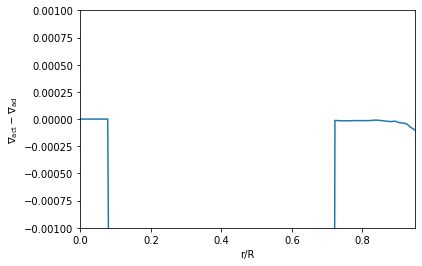

In [94]:
# Exercise 4.
# Make another plot showing the temperature gradient compared to the adiabatic temperature gradient as a function
# of the normalized radius coordinate, r/R.
# Describe in words what is happening to the thermal gradient as the star evolves.
# Before settling onto the main sequence, the Sun is in its pre--main sequence phase.
# In this phase, it is not hot enough at the center to burn H enough to account for most of its luminosity,
# and so it gets its energy from converting gravitational potential energy into heat (by contracting). 
# How is the Sun transporting its energy in the pre--main sequence phase compared to today?